<center>
    
# [Компьютерное зрение](https://cogmodel.mipt.ru/wiki/index.php/%D0%9A%D0%BE%D0%BC%D0%BF%D1%8C%D1%8E%D1%82%D0%B5%D1%80%D0%BD%D0%BE%D0%B5_%D0%B7%D1%80%D0%B5%D0%BD%D0%B8%D0%B5)

## <center> Семинар 2 - Демозаикинг
***

In [ ]:
# if not installed
!pip install --quiet colour-demosaicing==0.2.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 KB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 47.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 KB 14.4 MB/s eta 0:00:00


In [ ]:
# нужно, чтобы cv2 открывал exr изображения
import os
os.environ["OPENCV_IO_ENABLE_OPENEXR"]="1"

In [ ]:
from pathlib import Path

import cv2

import colour

from colour_demosaicing import (
    demosaicing_CFA_Bayer_bilinear,
    demosaicing_CFA_Bayer_Malvar2004,
    demosaicing_CFA_Bayer_Menon2007,
    mosaicing_CFA_Bayer)

import matplotlib.pyplot as plt
import numpy as np

In [ ]:
LIGHTHOUSE_IMG_PATH = "data/lighthouse.exr"

if not Path(LIGHTHOUSE_IMG_PATH).exists():
    !git clone https://github.com/alexmelekhin/cv_course_2023.git
    !mv cv_course_2023/seminars/seminar_02/data .

Cloning into 'cv_course_2023'...
remote: Enumerating objects: 65, done.
remote: Counting objects: 100% (65/65), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 65 (delta 19), reused 56 (delta 11), pack-reused 0
Unpacking objects: 100% (65/65), 8.35 MiB | 6.43 MiB/s, done.


In [ ]:
rgb_img = cv2.imread(LIGHTHOUSE_IMG_PATH, cv2.IMREAD_UNCHANGED)[:, :, ::-1]
rgb_img = colour.cctf_encoding(rgb_img)
rgb_img.dtype

dtype('float64')

In [ ]:
rgb_img.shape

(768, 512, 3)

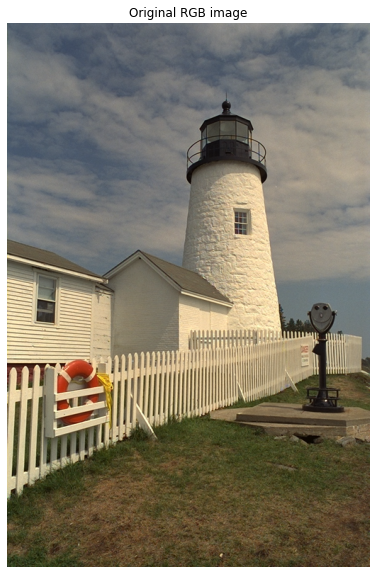

In [ ]:
plt.figure(figsize=[10, 10])
plt.axis("off")
plt.title("Original RGB image")
plt.imshow(rgb_img)

In [ ]:
mosaiced_image = mosaicing_CFA_Bayer(rgb_img, pattern="RGGB")
mosaiced_image.shape

(768, 512)

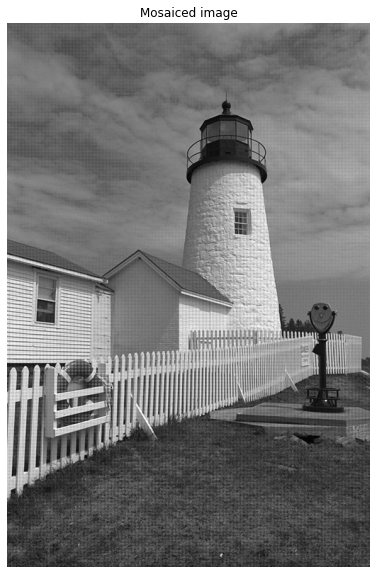

In [ ]:
plt.figure(figsize=[10, 10])
plt.axis("off")
plt.title("Mosaiced image")
plt.imshow(mosaiced_image, cmap="gray")

In [ ]:
def separate_chanel_rggb(img):
    new_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=img.dtype)
    new_img[0::2, 0::2, 0] = img[0::2, 0::2]  # R
    new_img[0::2, 1::2, 1] = img[0::2, 1::2]  # G1
    new_img[1::2, 0::2, 1] = img[0::2, 1::2]  # G2
    new_img[1::2, 1::2, 2] = img[0::2, 1::2]  # B
    return new_img

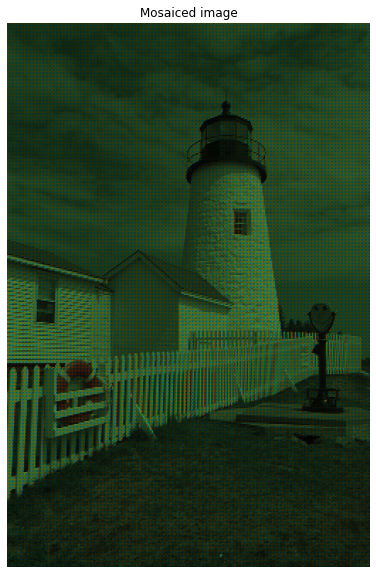

In [ ]:
plt.figure(figsize=[10, 10])
plt.axis("off")
plt.title("Mosaiced image")
plt.imshow(separate_chanel_rggb(mosaiced_image))

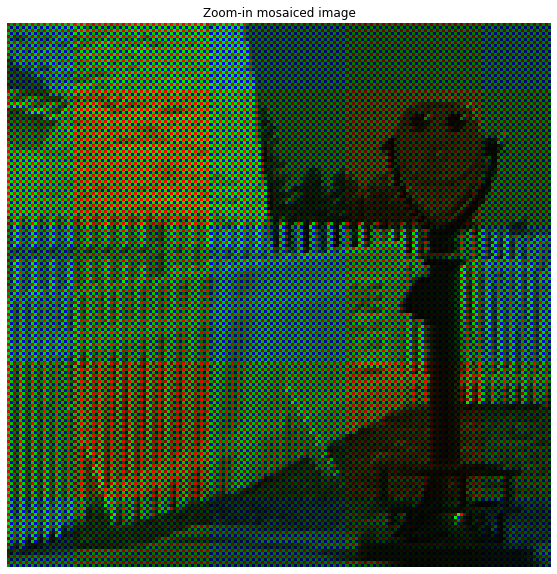

In [ ]:
plt.figure(figsize=[10, 10])
plt.axis("off")
plt.title("Zoom-in mosaiced image")
plt.imshow(separate_chanel_rggb(mosaiced_image)[370:550, 300:480])

# Bilinear

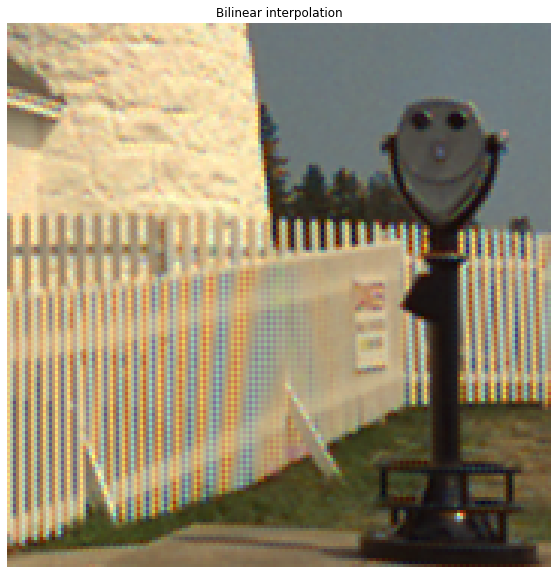

In [ ]:
plt.figure(figsize=[10, 10])
plt.axis("off")
plt.title("Bilinear interpolation")
plt.imshow(demosaicing_CFA_Bayer_bilinear(mosaiced_image)[370:550, 300:480])

# Malvar (2004)

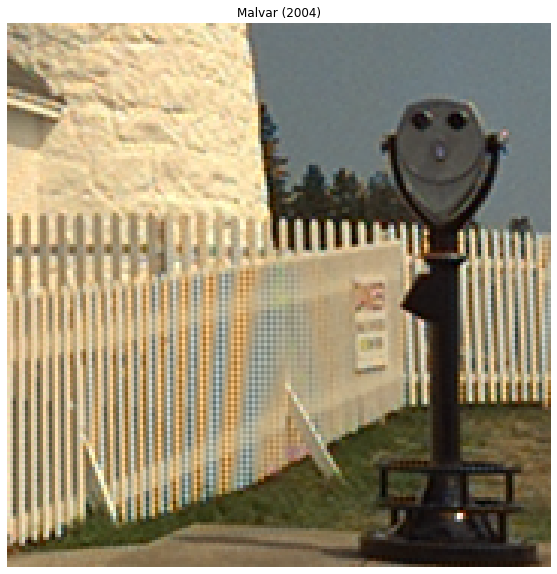

In [ ]:
plt.figure(figsize=[10, 10])
plt.axis("off")
plt.title("Malvar (2004)")
plt.imshow(demosaicing_CFA_Bayer_Malvar2004(mosaiced_image)[370:550, 300:480])

# Menon (2007)

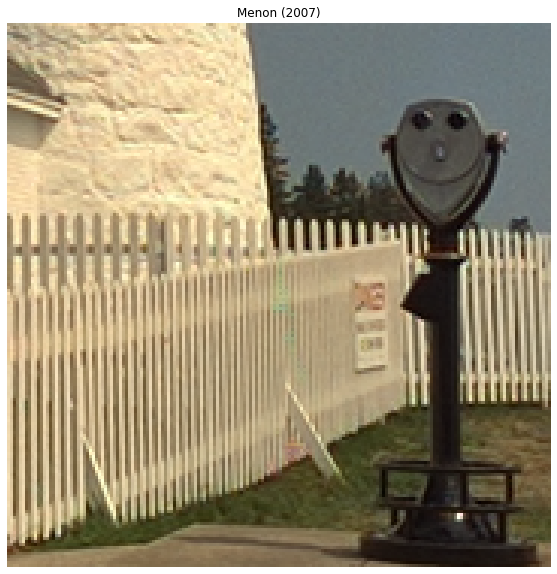

In [ ]:
plt.figure(figsize=[10, 10])
plt.axis("off")
plt.title("Menon (2007)")
plt.imshow(demosaicing_CFA_Bayer_Menon2007(mosaiced_image)[370:550, 300:480])

# Домашнее задание

Вы часто будете сталкиваться с изображениями в RAW-формате при работе с индустриальными камерами и датасетами в области робототехники и беспилотного транспорта.

Например, датасет Oxford RobotCar содержит изображения в формате Bayer GBRG 8-bit (для камеры stereo).

In [ ]:
OXFORD_SAMPLE_1_PATH = "data/oxford_robotcar_sample_1.png"
OXFORD_SAMPLE_2_PATH = "data/oxford_robotcar_sample_2.png"

if not Path(OXFORD_SAMPLE_1_PATH).exists():
    !git clone https://github.com/alexmelekhin/cv_course_2023.git
    !mv cv_course_2023/seminars/seminar_02/data .

In [ ]:
oxford_img_1 = (cv2.imread(OXFORD_SAMPLE_1_PATH, cv2.IMREAD_UNCHANGED) / 255).astype("float")
oxford_img_2 = (cv2.imread(OXFORD_SAMPLE_2_PATH, cv2.IMREAD_UNCHANGED) / 255).astype("float")

oxford_img_1.shape, oxford_img_1.dtype

((960, 1280), dtype('float64'))

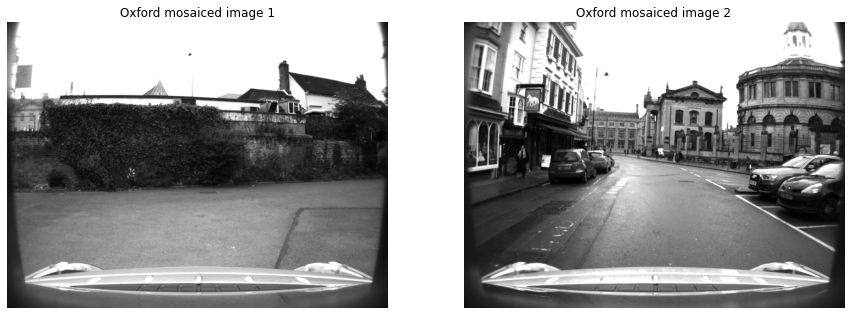

In [ ]:
plt.figure(figsize=[15, 10])
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Oxford mosaiced image 1")
plt.imshow(oxford_img_1, cmap="gray")
plt.subplot(1, 2, 2)
plt.axis("off")
plt.title("Oxford mosaiced image 2")
plt.imshow(oxford_img_2, cmap="gray")

## Задание

Попробуйте разные алгоритмы демозаикинга на изображениях из RobotCar. Найдите участки с артефактами и сравните их между собой.

Oxford image 1


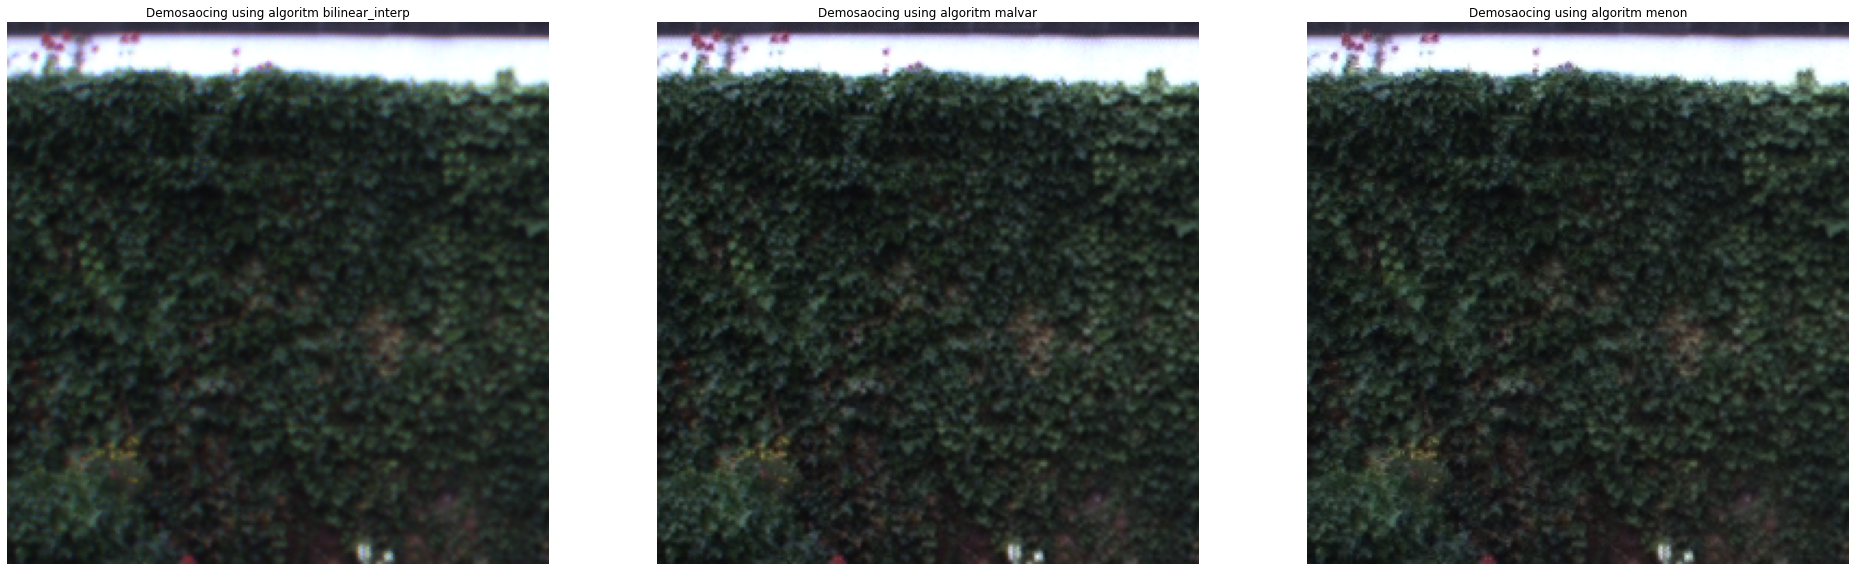

Oxford image 2


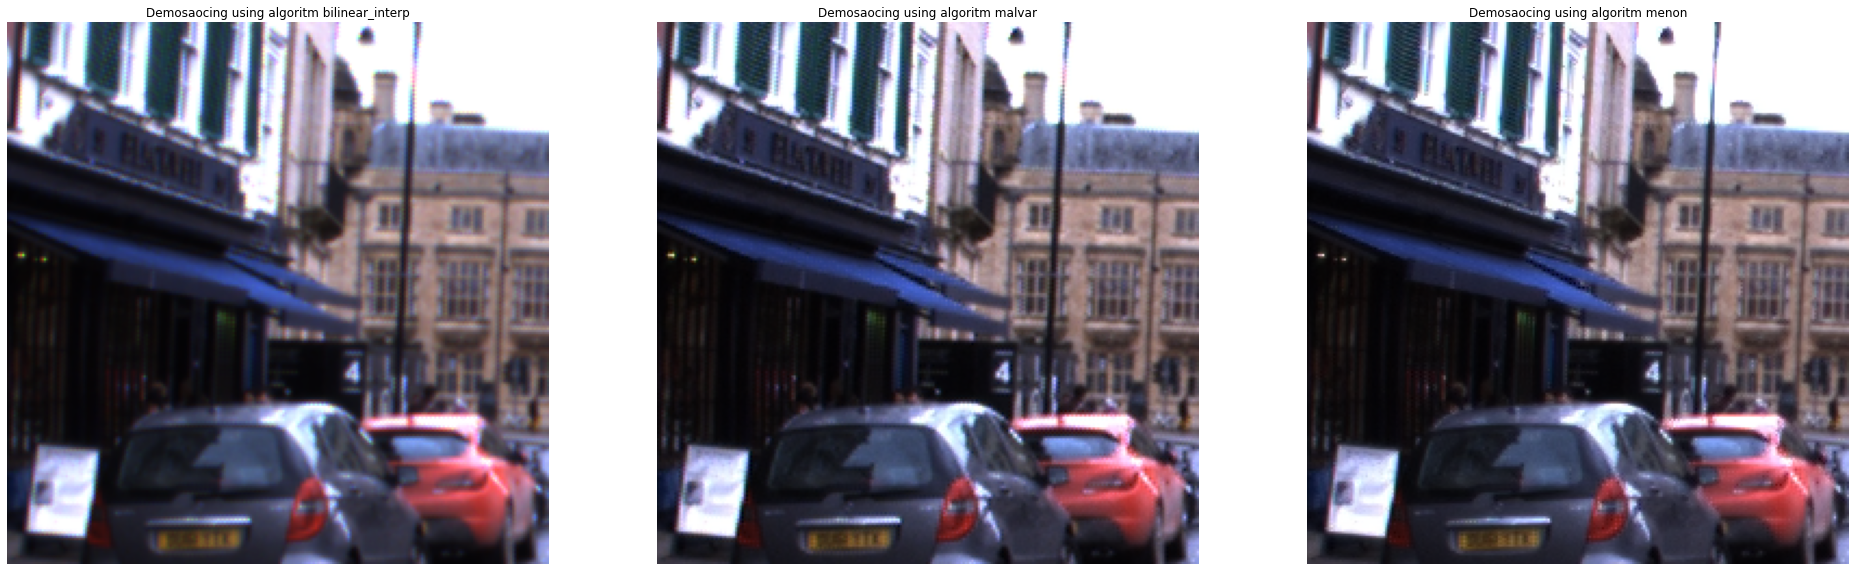

In [ ]:
def demosaic_image(img: np.ndarray, img_slice: list = None) -> None:
    plt.figure(figsize=[33, 10])
    algo_to_func = dict(
        bilinear_interp = demosaicing_CFA_Bayer_bilinear,
        malvar = demosaicing_CFA_Bayer_Malvar2004, 
        menon = demosaicing_CFA_Bayer_Menon2007
    )
    for ind, algo in enumerate(["bilinear_interp", "malvar", "menon"]):
        plt.subplot(1, 3, ind+1)
        plt.title(f"Demosaocing using algoritm {algo}")
        plt.axis("off")
        dm_img = np.clip(algo_to_func[algo](img, pattern = "gbrg")[250:500, 250:500], 0, 1)
        plt.imshow(dm_img)
    plt.show()
    
    return None

# img_slice = [370:550, 300:480]

print("Oxford image 1")
_ = demosaic_image(oxford_img_1)
print("Oxford image 2")
_ = demosaic_image(oxford_img_2)

Будучи честным, я исследовал многие кусочки изображений и не нашёл особых претензий или выдающихся артефактов, кроме того, что от первого алгоритма к третьему (слева направо) качество восстановленного изображения увеличививается (при билинейной интерполяции совсем смазанно), увеличивается яркость цветов. Никаких особо деталей не заметил.